# Data Preprocessing Template

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing the dataset

In [ ]:
housing = pd.read_csv('/content/housing.csv')
housing.head()
housing.tail()
housing.info() #info about the dataset features
housing.describe() #gives all the statustical measures
housing['ocean_proximity'].value_counts() #gives info on all diff values and their count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Histogram

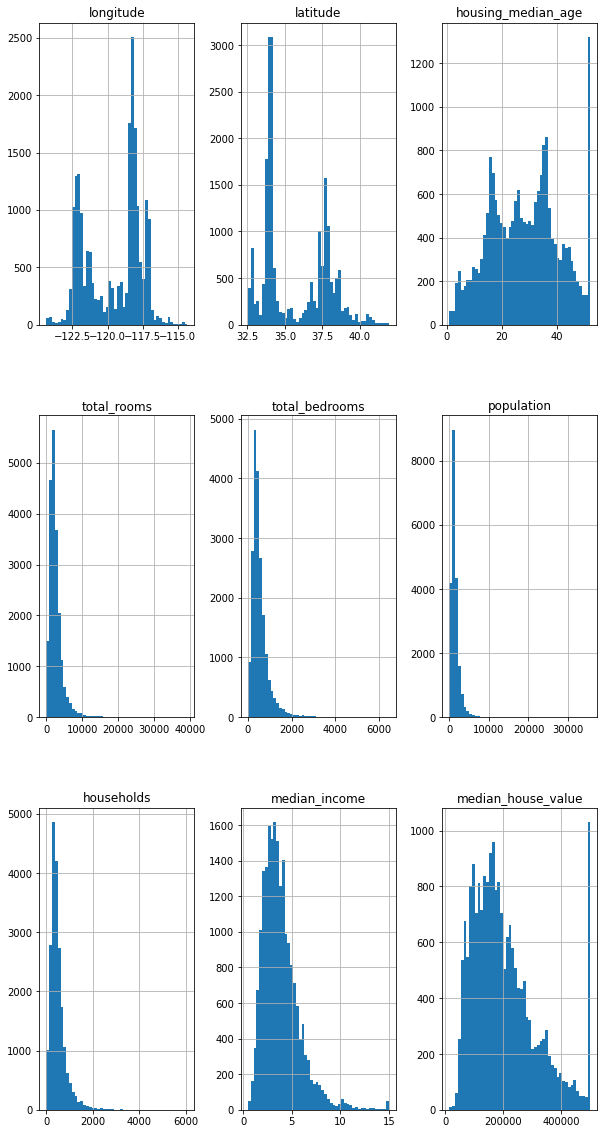

In [ ]:
housing.hist(bins=50, figsize=(10,20))
plt.show()

## Histogram continued

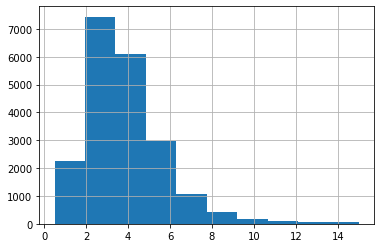

In [ ]:
housing["median_income"].hist()

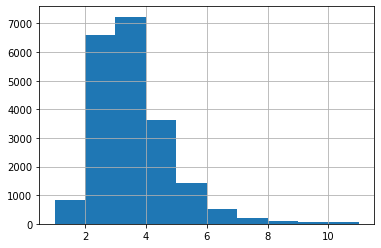

In [ ]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].hist()

In [ ]:
housing["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

## pandas cut

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
labels = [1,2,3,4,5]) #make new set of bins and labels for each new bin range

In [ ]:
housing["income_cat"].value_counts() #frequency computation of each number
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3


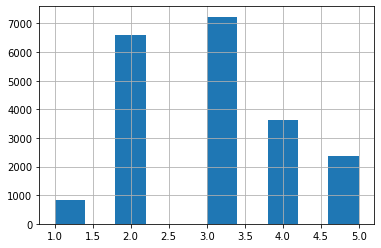

In [ ]:
housing["income_cat"].hist()

## Splitting the dataset into the Training set and Testing set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
# income category proportion in test set generated with stratidied sampling
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

## percentage of error generated

In [ ]:
# lets compare income category proportion in stratified sampling and random sampling
from sklearn.model_selection import train_test_split
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


## Heat Map

In [ ]:
housing = strat_train_set.copy()

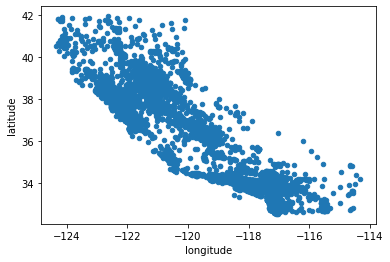

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

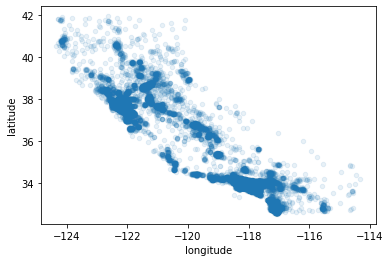

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

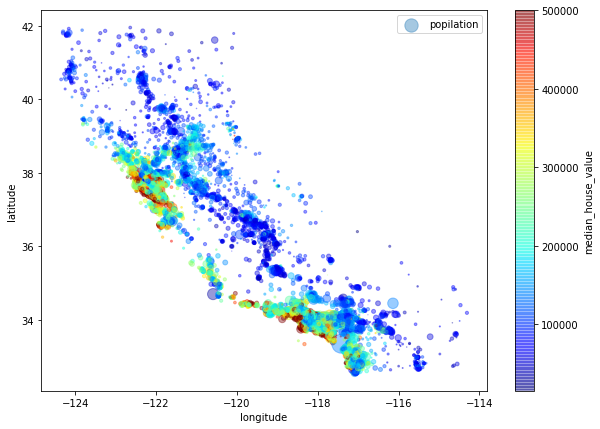

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing["population"]/100, label = "popilation", figsize = (10,7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
             sharex = False)
plt.legend()

In [ ]:
# find correlation between the attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)
# cleck how median_house_value is correlated to other attribures
# median_income increases house price also goes up so correlation in formed which is closest
# negative correlation is also good... for eg latitude

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa27474d0>,
      dtype=object)

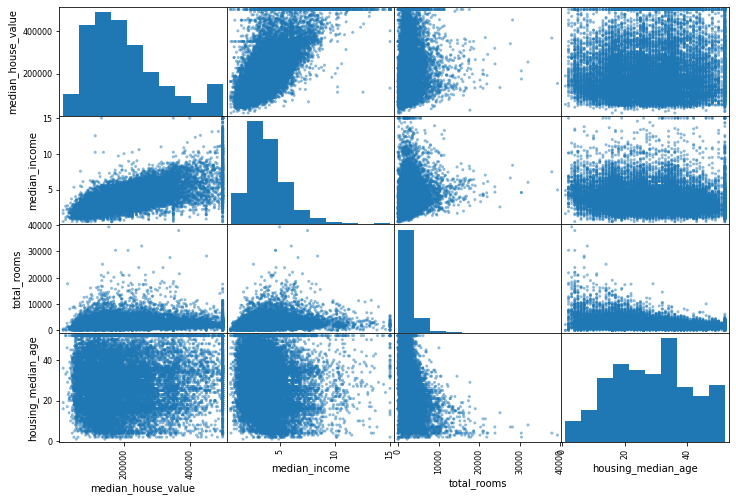

In [ ]:
# from pandas.tools.plotting import scatter_matrix # for older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

(0.0, 16.0, 0.0, 550000.0)

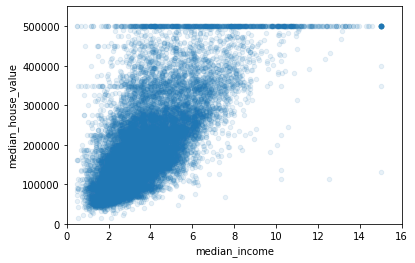

In [ ]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
plt.axis([0, 16, 0, 550000])

# Work on Stratified Data

In [ ]:
# drop na - NaN (drop the columns with NaN as value)
# drop
# imputer
# these 3 options are used to provide numerical values
# to display new values of all calculating use statistics or _ median()

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 4. Prepare the data for machine learning algorithms

In [ ]:
#work on stratified data so copy stratified training set and drop the target value from
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing # median house value column is removed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,2
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46,1271,236.0,573,210,4.9312,INLAND,4
12053,-117.56,33.88,40,1196,294.0,1052,258,2.0682,INLAND,2
13908,-116.40,34.09,9,4855,872.0,2098,765,3.2723,INLAND,3
11159,-118.01,33.82,31,1960,380.0,1356,356,4.0625,<1H OCEAN,3


# Data cleaning


In [ ]:
# list the rows with total_bedrooms as NAN
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18,3759,NaN,3296,1462,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16,4632,NaN,3038,727,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30,1955,NaN,999,386,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6,2155,NaN,1039,391,1.6675,INLAND,2
19252,-122.79,38.48,7,6837,NaN,3468,1405,3.1662,<1H OCEAN,3


In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True) # option 3

In [ ]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18,3759,433.0,3296,1462,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16,4632,433.0,3038,727,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30,1955,433.0,999,386,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6,2155,433.0,1039,391,1.6675,INLAND,2
19252,-122.79,38.48,7,6837,433.0,3468,1405,3.1662,<1H OCEAN,3


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1) # drop the categorical column

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
X = imputer.transform(housing_num) # X is a numpy array (capital X)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [ ]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing.index) # create a dataframe back using numpy

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0
